In [133]:
# load libraries

import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from scipy.stats import ttest_rel


from action_prediction import constants as const
from action_prediction.data import DataSet
from action_prediction import visualize as vis

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [72]:
# initialize dataset
data = DataSet(task='social_prediction')

#load confirmed participants
df_participants = pd.read_csv("../data/behavior/confirmed_participants.csv")
df_participants = df_participants[['public_id', 'paid_full', 'sex']]
df_participants['participant'] = df_participants['sex'].map({'M': 'male', 'F': 'female'})

# load behavior
df_behav = data.load_behav()
df_behav = df_behav.merge(df_participants, left_on='subj', right_on='public_id')

# load eyetracking
df_eye = data.load_eye(data_type='events')

# merge eyetracking with behav
df_merged = data.merge_behav_eye(dataframe_behav=df_behav, dataframe_eye=df_eye)

# #merge demographic data with behav/eyetracking
# df_merged = df_merged.merge(df_participants, left_on='subj', right_on='public_id')


In [73]:

# initialize plotting style
vis.plotting_style()


<Figure size 600x600 with 0 Axes>

##### Questions/relationships to explore

In [44]:
df_merged.columns

Index(['peak_velocity', 'amplitude', 'dispersion', 'start_gx', 'start_gy',
       'end_gx', 'end_gy', 'surface', 'end_time', 'type', 'duration',
       'mean_gx', 'mean_gy', 'block_iter', 'exp_event', 'task', 'event_type',
       'run_num', 'subtract', 'onset_sec', 'subj', 'sess', 'start_time',
       'actors', 'agents', 'angle', 'balance_exp', 'condition_name', 'context',
       'corr_key', 'corr_resp', 'dataset', 'display_trial_feedback',
       'extracted', 'feedback_type', 'hand', 'initiator',
       'initiator_start_frames', 'initiator_start_frames_corr',
       'initiator_start_frames_sec', 'interact_start_frames',
       'interact_start_frames_corr', 'interact_start_frames_sec', 'iti_dur',
       'label', 'media', 'real_start_time', 'replace_stimuli', 'resp_made',
       'rt', 'run_iter', 'session_type', 'stim', 'timestamp_sec', 'trial_dur',
       'trial_type', 'video_end', 'video_name', 'video_name_corrected',
       'video_start', 'block_iter_corr', 'public_id', 'paid_full', 

In [114]:
df_merged['label'].unique()

array(['handShake', 'hug'], dtype=object)

T-test of significance for accuracy differences between sess1 and sess2 across all participants

In [46]:
df_merged.columns
df_merged.block_iter_corr.unique()


array(['run01_block1', 'run01_block2', 'run01_block3', 'run02_block1',
       'run02_block2', 'run02_block3', 'run03_block1', 'run03_block2',
       'run03_block3', 'run04_block1', 'run04_block2', 'run04_block3',
       'run05_block1', 'run05_block2', 'run05_block3', 'run06_block1',
       'run06_block2', 'run06_block3', 'run07_block1', 'run07_block2',
       'run07_block3', 'run08_block1', 'run08_block2', 'run08_block3',
       'run09_block1', 'run09_block2', 'run09_block3', 'run10_block1',
       'run10_block2', 'run10_block3', 'run11_block1', 'run11_block2',
       'run11_block3', 'run12_block1', 'run12_block2', 'run12_block3',
       'run13_block1', 'run13_block2', 'run13_block3', 'run14_block1',
       'run14_block2', 'run14_block3'], dtype=object)

# Fig. 1- Subplot Components

### Fig 1. Panel A- Accuracy Over Runs

No handles with labels found to put in legend.


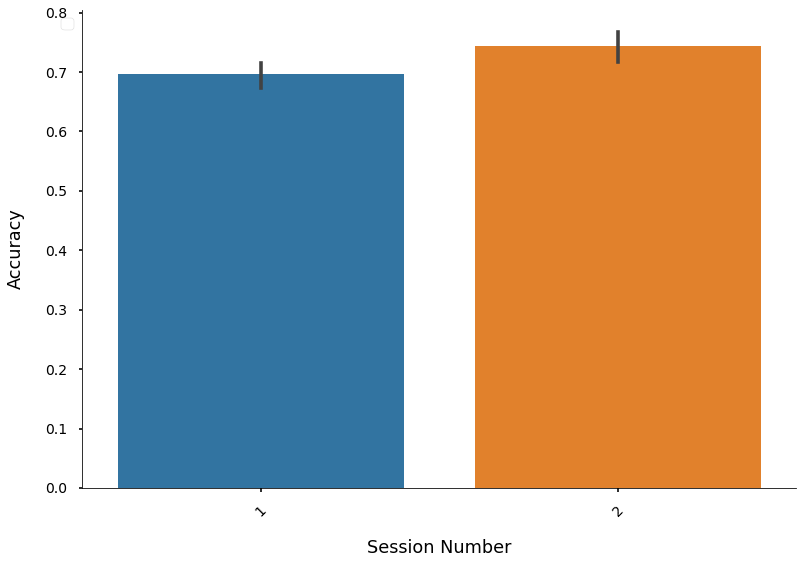

In [291]:

fig1A= vis.plot_acc(dataframe=df_sess, x='sess', hue = None, 
                    x_title = "Session Number", save_title = "Fig1A.png")

### T-test of significance for accuracy differences between sess1 and sess2 across all participants

In [289]:
# group by whichever variables you are interested
# run a T-test
# let's first run a T-test (i.e. one-way ANOVA on RT diff between patient and control)
df_sess = df_merged.groupby(['subj', 'sess'])['corr_resp'].mean().reset_index()
sess1_acc = df_sess.query('sess == 1')['corr_resp']
sess2_acc = df_sess.query('sess == 2')['corr_resp']
t, p = ttest_ind(sess1_acc, sess2_acc)
print(f't(21)={t}, p={p}') 

t(21)=-2.818418171589711, p=0.007396091061108679


In [299]:
df_sess

,subj,sess,corr_resp
0,sAA,1,0.744935
1,sAA,2,0.748462
2,sAA1,1,0.678571
3,sAA1,2,0.797619
4,sAA2,1,0.734369
5,sAA2,2,0.738827
6,sAE,1,0.742407
7,sAE,2,0.780807
8,sAO,1,0.727772
9,sAO,2,0.763885


### Fig 1. Panel B- Accuracy Change Over Runs By Condition Name

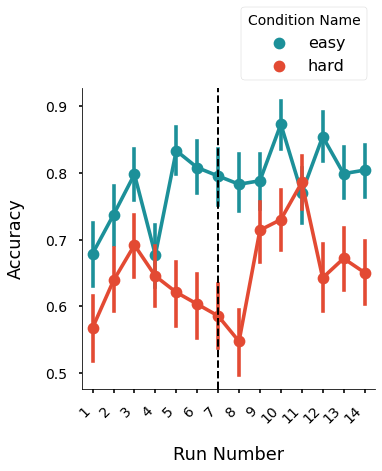

In [64]:

vis.plot_acc(dataframe=df_behav, x='run_num', 
                    hue= 'condition_name', hue_order = ['easy', 'hard'], palette = ['#1c9099', '#e34a33'],
                    x_title= "Run Number", legend_title = "Condition Name", save_title = 'posterfig1A.png')


In [103]:
import pandas as pd
from scipy.stats import f_oneway
# group by whichever variables you are interested
df_grouped = df_merged.groupby(['subj', 'condition_name'])['corr_resp'].mean().reset_index()
# run an F test
# let's first run an F test (i.e. one-way ANOVA on RT diff between patient and control)
easy_acc = df_grouped.query('condition_name=="easy"')['corr_resp']
hard_acc = df_grouped.query('condition_name=="hard"')['corr_resp']
F, p = f_oneway(easy_acc, hard_acc)
print(f'F={F}, p={p}')

F=58.35641808165899, p=1.7963828982136173e-09


In [222]:
df_grouped

,subj,condition_name,corr_resp
0,sAA,easy,0.831573
1,sAA,hard,0.662605
2,sAA1,easy,0.809524
3,sAA1,hard,0.666667
4,sAA2,easy,0.792548
5,sAA2,hard,0.681410
6,sAE,easy,0.813583
7,sAE,hard,0.709768
8,sAO,easy,0.802030
9,sAO,hard,0.689730


No handles with labels found to put in legend.


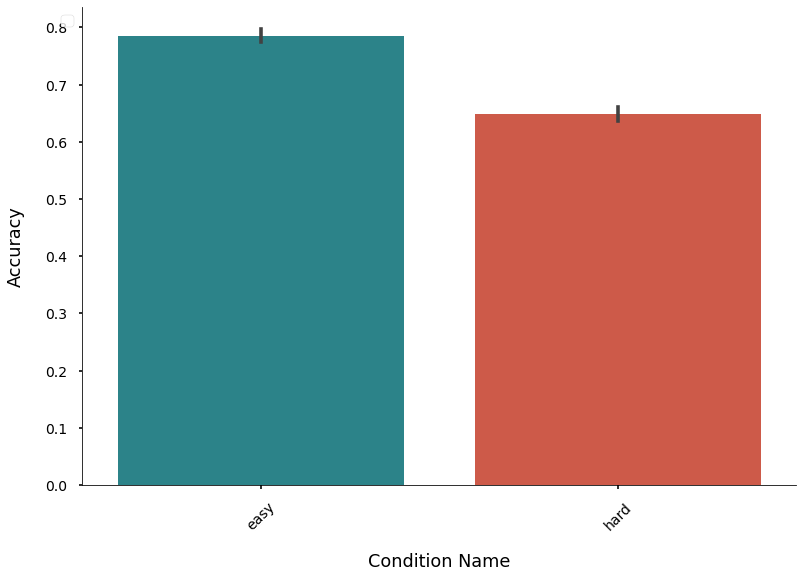

In [74]:
vis.plot_acc(dataframe=df_behav, x='condition_name', hue_order = ['easy', 'hard'], palette = ['#1c9099', '#e34a33'],
                    x_title= "Condition Name", save_title = 'posterfig1B.png')                         

In [104]:
import pandas as pd
from scipy.stats import ttest_ind
# group by whichever variables you are interested
df_grouped = df_merged.groupby(['subj', 'condition_name'])['corr_resp'].mean().reset_index()
# run a T-test
# let's first run a T-test (i.e. one-way ANOVA on RT diff between patient and control)
easy_acc = df_grouped.query('condition_name=="easy"')['corr_resp']
hard_acc = df_grouped.query('condition_name=="hard"')['corr_resp']
t, p = ttest_ind(easy_acc, hard_acc)
print(f't(20)={t}, p={p}')

t(20)=7.639137260297062, p=1.7963828982136483e-09


### Fig 1. Panel C- Reaction Time Over Runs

No handles with labels found to put in legend.


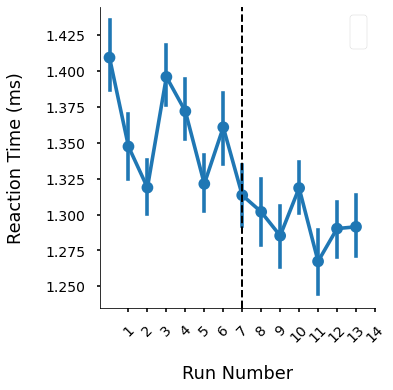

In [76]:
fig1C = vis.plot_rt(dataframe=df_behav, x='run_num', hue= None, 
                   x_title= "Run Number", save_title = 'fig1C.png', fig_title = None)

T-test of significance for reaction time differences between sess1 and sess2 across all participants

In [142]:
df_rt = df_merged.groupby(['subj', 'sess'])['rt'].mean().reset_index()
sess1_rt = df_rt.query('sess == 1')['rt']
sess2_rt = df_rt.query('sess == 2')['rt']
t, p = ttest_ind(sess1_rt, sess2_rt)
print(f't(21)={t}, p={p}') 

t(21)=2.5674862138271397, p=0.013988262871575117


In [247]:
sess1_rt

0     1.360163
2     1.411931
4     1.353369
6     1.353976
8     1.332485
10    1.359642
12    1.312179
14    1.286712
16    1.384946
18    1.168748
19    1.301800
21    1.327807
23    1.367488
25    1.252459
27    1.338204
29    1.233704
31    1.332998
33    1.359674
35    1.347598
37    1.284522
39    1.189502
41    1.357902
Name: rt, dtype: float64

In [183]:
df_rt_acc = df_merged.groupby(['subj', 'sess']).agg({'rt': 'mean', 'corr_resp': 'mean'}).reset_index(drop=True)
df_rt_acc
np.corrcoef(df_rt_acc['corr_resp'], df_rt_acc['rt'])

array([[1.       , 0.1943921],
       [0.1943921, 1.       ]])

In [184]:
from scipy.stats import pearsonr
corr, p = pearsonr(df_rt_acc['corr_resp'], df_rt_acc['rt'])
corr, p



(0.19439210479793692, 0.21162536141305924)

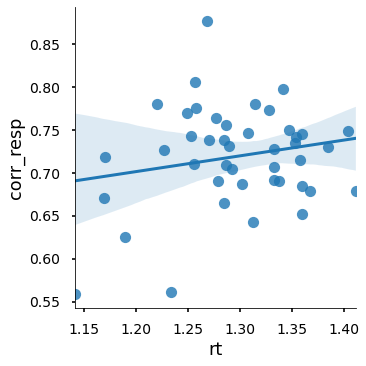

In [185]:
sns.lmplot(x='rt', y='corr_resp', data=df_rt_acc)

### There is a weak positive correlation between rt and accuracy. The reported Pearson correlation coefficient is insignificant. This association suggests no evidence of a participant speed-accuracy tradeoff, meaning that people did not slow their reaction times in order to achieve higher accuracy. 




# Fig. 2 Subplot Components

Fig 2- Eyetracking Data- Panel a (Fixation, saccade, blink count averages ** also note that we aren't using blink info), b (fixation counts and saccade counts over runs), c) fixation duration (fixation) over runs, d) amplitude (saccades) over runs

Can also prepare supplemental figures- maybe include more on velocity, dispersion, etc here

### Fig. 2 Panel A- Eye Movement Averages

In [ ]:

#look into label and condition, initiator + label, etc

In [ ]:
#df_merged.groupby(['type', 'subj', 'initiator'])["type"].count().reset_index(name='count')

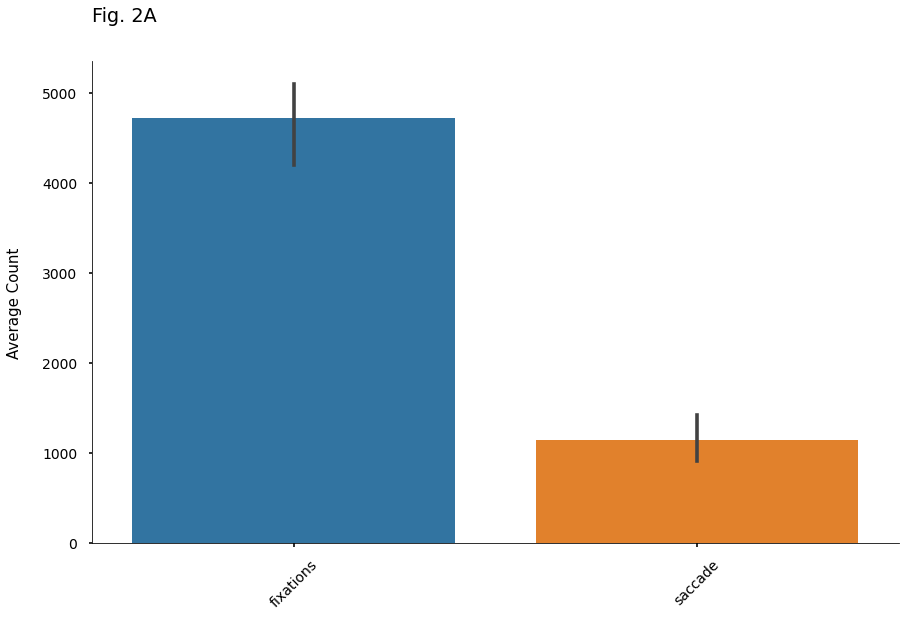

In [262]:
fig_2A =vis.plot_all_count(df_merged, x='type', hue=None, fig_title = "Fig. 2A", save_title = "fig2A.png")

#avg number of counts across runs and sessions for each subject
#average count, error bars show variation between indiv. subjects

 ### Fig. 2 Panel B- Fixation Counts over Runs

In [264]:
df_eyecount = df_merged.groupby(['subj', 'type'])["type"].count().reset_index(name='count') 
df_eyecount
fix_count = df_eyecount.query('type =="fixations"')['count']
saccade_count = df_eyecount.query('type == "saccade"')['count']
t, p = ttest_ind(fix_count, saccade_count)
print(f't(21)={t}, p={p}') 



t(21)=13.164844822575125, p=2.503339608439022e-15


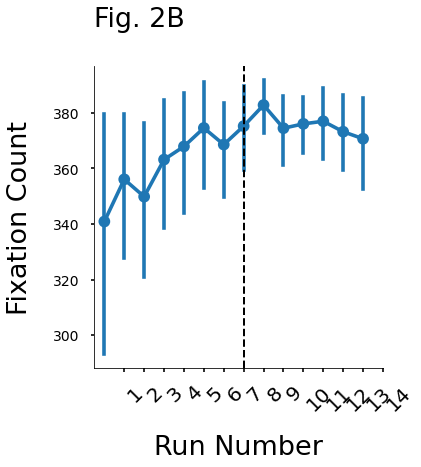

In [265]:
fig2B = vis.plot_fixation_count(df_merged, x='run_num', hue=None, x_title = "Run Number", fig_title = 'Fig. 2B', save_title = "fig2B.png")
                                
                                

In [271]:
df_fixcount = df_merged.groupby(['subj','sess', 'type'])["type"].count().reset_index(name='count').query('type=="fixations"')
df_fixcount
sess1_fix = df_fixcount.query('sess == 1')['count']
sess2_fix = df_fixcount.query('sess == 2')['count']
t, p = ttest_ind(sess1_fix, sess2_fix)
print(f't(21)={t}, p={p}') 

t(21)=-1.232178789150228, p=0.22633577533584956


 ### Fig. 2 Panel C- Saccade Counts over Runs

In [ ]:
fig2C =vis.plot_saccade_count(df_merged, x='run_num', hue=None, x_title = "Run Number", fig_title = "Fig. 2C", save_title = 'fig2C.png')

 ### Fig. 2 Panel D- Fixation Duration over Runs

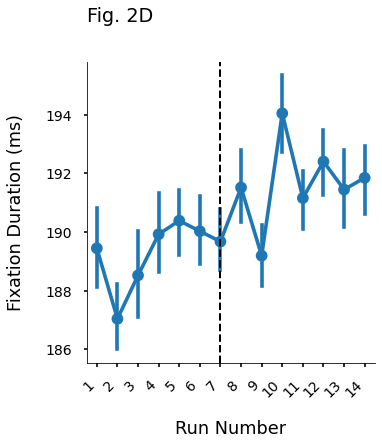

In [275]:
fig2D =vis.plot_fixation_duration(df_merged, x='run_num', hue=None, x_title ="Run Number", fig_title = "Fig. 2D", save_title = 'fig2D.png')

In [285]:
df_fixdur = df_merged.query('type=="fixations"').groupby(['subj','sess'])['duration'].mean().reset_index()
df_fixdur
sess1_fixdur = df_fixdur.query('sess == 1')['duration']
sess2_fixdur = df_fixdur.query('sess == 2')['duration']
t, p = ttest_ind(sess1_fixdur, sess2_fixdur)
print(f't(21)={t}, p={p}') 

t(21)=-1.0386878686254426, p=0.30628059341617764


# Question 2 Analysis 

### EXAMPLE: Two-way repeated measure ANOVA

In [307]:
df_plant=pd.read_csv("https://reneshbedre.github.io/assets/posts/anova/plants_leaves_two_within.csv")
from statsmodels.stats.anova import AnovaRM
res=AnovaRM(data=df, depvar='num_leaves', within=['time', 'year'], subject='plants')
print(res.fit())

                 Anova
          F Value  Num DF  Den DF Pr > F
----------------------------------------
time      158.6573 4.0000 16.0000 0.0000
year        3.6000 1.0000  4.0000 0.1306
time:year   1.4545 4.0000 16.0000 0.2621



In [89]:
df_behav["initiator_condition_name"]= df_behav["initiator"] + "_" + df_behav["condition_name"] 
df_merged["initiator_condition_name"]= df_merged["initiator"] + "_" + df_merged["condition_name"] 
#can use this method for combining variable conditions across any column

df_behav["initiator_label"]= df_behav["initiator"] + "_" + df_behav["label"] 
df_merged["initiator_label"]= df_merged["initiator"] + "_" + df_merged["label"] 

### Plot: Accuracy by Label and Condition Name

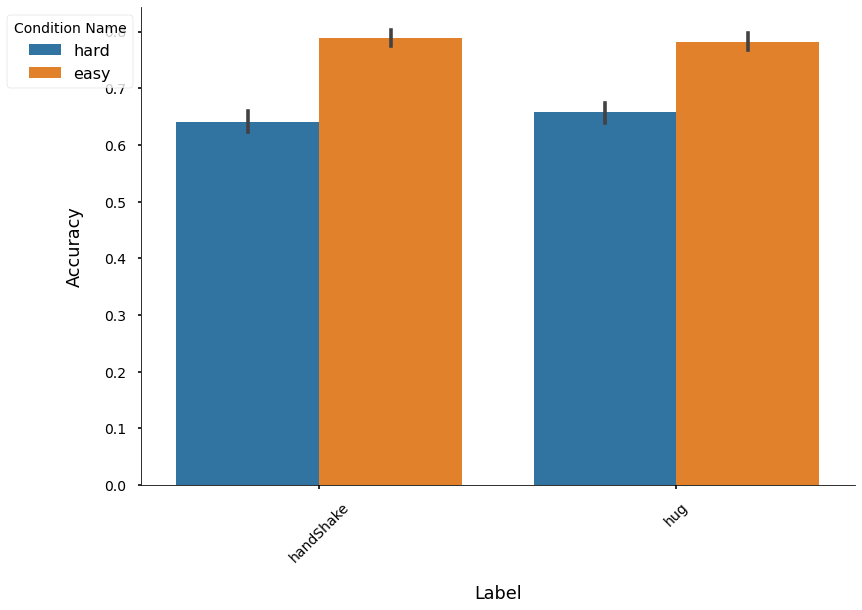

In [311]:
#Fig 3, 
vis.plot_acc(dataframe=df_behav, x='label', hue= "condition_name", x_title = "Label", legend_title = "Condition Name", save_title = "fig3A.png", hue_order = ["easy", "hard"])
#more of a control result, make figure with control results (ex. no accuracy/ rt tradeoff)

In [312]:
df_lab_cond = df_merged.groupby(['subj', 'label', 'condition_name'])['corr_resp'].mean().reset_index()

#df_lab_cond


### Two-way repeated measure ANOVA
IV: Accuracy

DV: label, condition_name

In [314]:
res_lab_cond = AnovaRM(data=df_lab_cond, depvar='corr_resp', within=['label', 'condition_name'], subject='subj')
print(res_lab_cond.fit())

                       Anova
                     F Value  Num DF  Den DF Pr > F
---------------------------------------------------
label                  0.1671 1.0000 21.0000 0.6869
condition_name       120.6313 1.0000 21.0000 0.0000
label:condition_name   2.8587 1.0000 21.0000 0.1057



### Two-way (factorial design) ANOVA 
IV: Accuracy

DV: label, condition_name

In [313]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
df_lab_cond = df_merged.groupby(['subj', 'label', 'condition_name'])['corr_resp'].mean().reset_index()
lab_cond_model = ols('corr_resp ~ C(label) + C(condition_name) + C(label):C(condition_name)', data=df_lab_cond).fit()
anova_lab_cond = sm.stats.anova_lm(lab_cond_model, typ=2)
anova_lab_cond


,sum_sq,df,F,PR(>F)
C(label),0.000838,1.0,0.156560,6.933467e-01
C(condition_name),0.423470,1.0,79.106755,9.690259e-14
C(label):C(condition_name),0.005375,1.0,1.004132,3.191907e-01
Residual,0.449664,84.0,NaN,NaN


### Plot: Accuracy by Label and Initiator

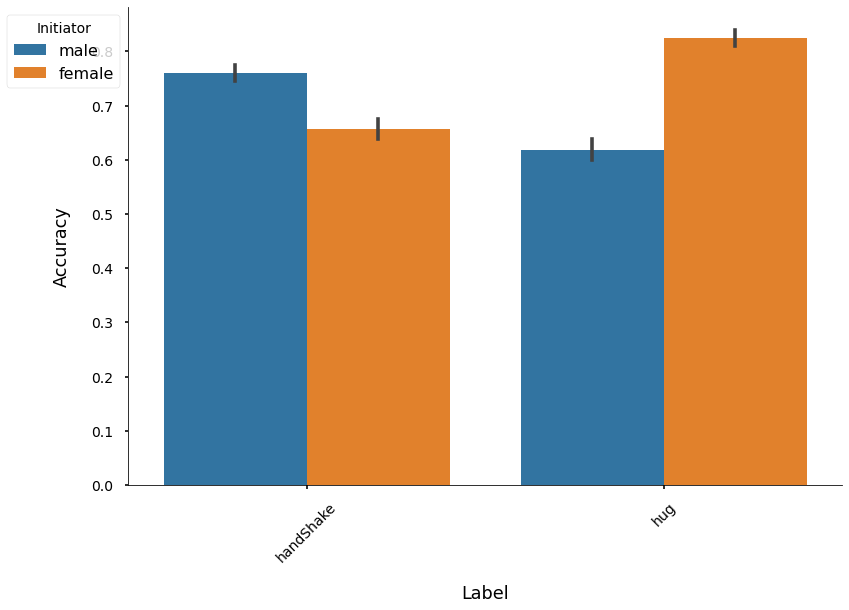

In [315]:
#Fig 3B.2
vis.plot_acc(dataframe=df_behav, x='label', hue= "initiator", x_title = "Label", legend_title = "Initiator", save_title = "fig3B.2.png", hue_order = None)
#more of a control result, make figure with control results (ex. no accuracy/ rt tradeoff)

In [309]:
df_lab_init = df_merged.groupby(['subj', 'label', 'initiator'])['corr_resp'].mean().reset_index()
#df_lab_init

## Two-way repeated measure ANOVA
IV: Accuracy

DV: label, initiator

In [308]:
res_lab_init = AnovaRM(data=df_lab_init, depvar='corr_resp', within=['label', 'initiator'], subject='subj')
print(res_lab_init.fit())


                    Anova
                F Value  Num DF  Den DF Pr > F
----------------------------------------------
label             0.8687 1.0000 21.0000 0.3619
initiator        26.8448 1.0000 21.0000 0.0000
label:initiator 145.9981 1.0000 21.0000 0.0000



### Two-way (factorial design) ANOVA 
IV: Accuracy

DV: label, initiator


In [306]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
lab_init_model = ols('corr_resp ~ C(label) + C(initiator) + C(label):C(initiator)', data=df_lab_init).fit()
anova_lab_init = sm.stats.anova_lm(lab_init_model, typ=2)
anova_lab_init


,sum_sq,df,F,PR(>F)
C(label),0.004512,1.0,0.796642,3.746490e-01
C(initiator),0.083624,1.0,14.764118,2.358520e-04
C(label):C(initiator),0.467230,1.0,82.490836,4.048874e-14
Residual,0.475778,84.0,NaN,NaN


### Plot: Fixation Count by Label and Initiator

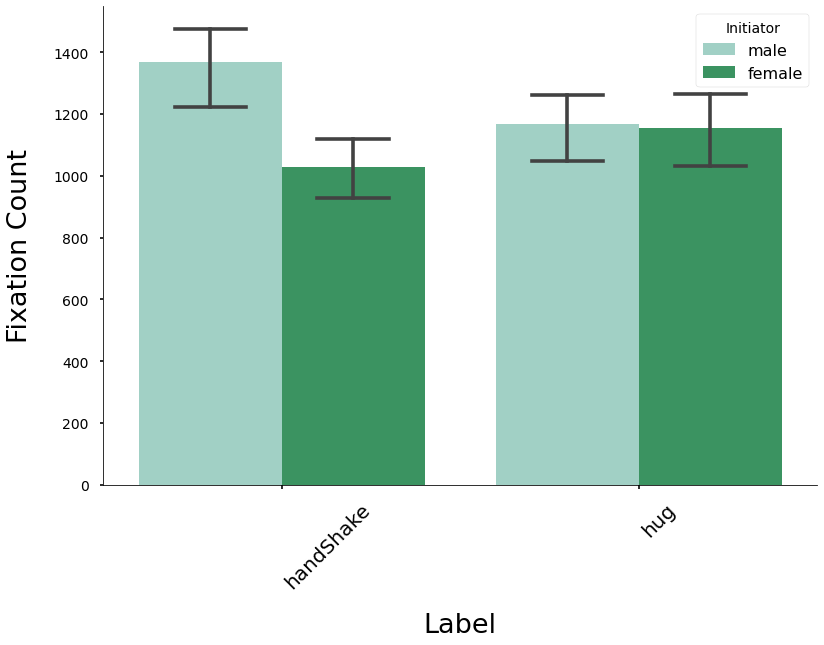

In [93]:
vis.plot_fixation_count(dataframe=df_merged, x='label', x_title='Label', hue= "initiator", legend_title='Initiator', hue_order=['male', 'female'], save_title = "posterfig3.png", palette = ['#99d8c9', '#2ca25f'])


In [318]:
df_fix_lab_init = df_merged.groupby(['subj', 'type', 'label', 'initiator'])["type"].count().reset_index(name='count').query('type =="fixations"') 
#df_fix_lab_init 

## Two-way repeated measure ANOVA
IV: Fixation count

DV: label, initiator

In [319]:
res_fix_lab_init = AnovaRM(data=df_fix_lab_init, depvar='count', within=['label', 'initiator'], subject='subj')
print(res_fix_lab_init.fit())

                    Anova
                F Value  Num DF  Den DF Pr > F
----------------------------------------------
label            48.7068 1.0000 18.0000 0.0000
initiator       385.2561 1.0000 18.0000 0.0000
label:initiator 192.7306 1.0000 18.0000 0.0000



In [ ]:
### Supplem

### Plot: Accuracy vs. Initiator and Participant Gender

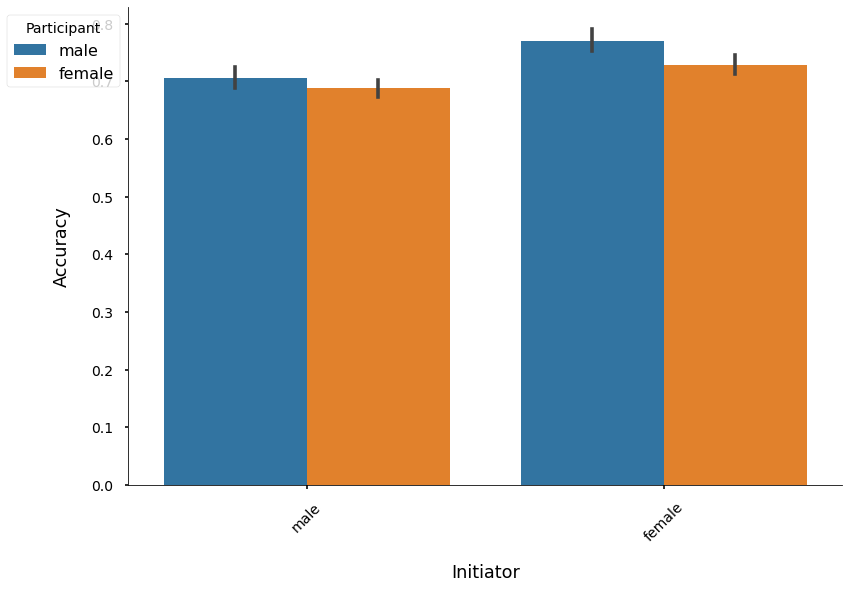

In [322]:
#Fig 3B.1
vis.plot_acc(dataframe=df_behav, x='initiator', hue= "participant", hue_order=['male','female'], x_title = "Initiator", legend_title = "Participant", save_title = "fig3B.1.png")
#more of a control result, make figure with control results (ex. no accuracy/ rt tradeoff)

### Plot: Accuracy vs. Initiator, Label, Participant Gender

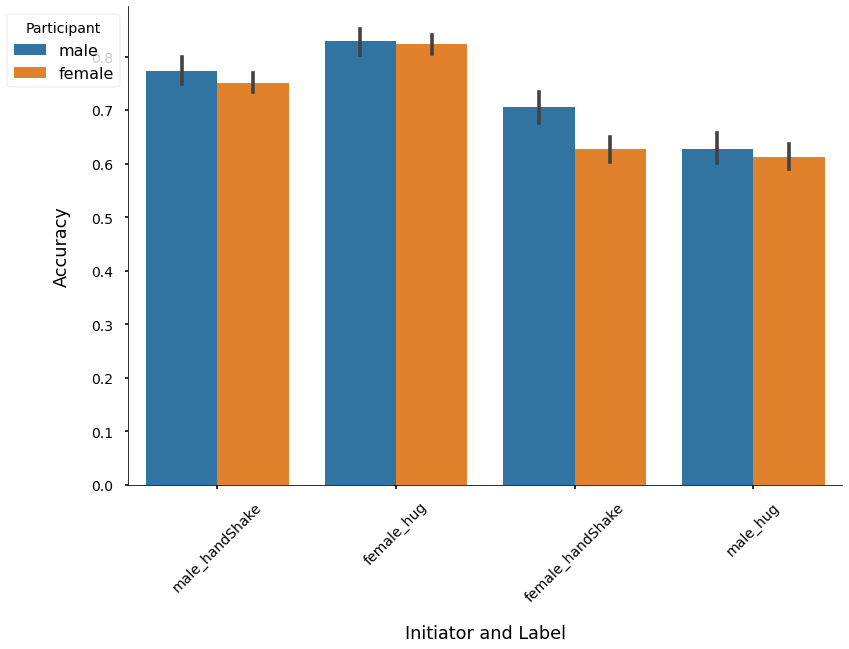

In [166]:
#Fig 3B.3
vis.plot_acc(dataframe=df_behav, x='initiator_label', hue= "participant", x_title = "Initiator and Label", legend_title = "Participant", save_title = "fig3B.3.png")
#more of a control result, make figure with control results (ex. no accuracy/ rt tradeoff)


# Fig. 4 Subplot Components

When comparing accuracy and label broken down by initiator and condition name, participants were least accurate in making predictions for the hug label when males initiated in the hard condition, and most accurate when making predictions for the hug label when females initiated in the easy condition.

Consider demographic information of the participants; download confirmed participants CSV, merge with behavioral and eyetracking data, common ID(subj_ID), filter by (paid_full)

See whether accuracy breakdown is affected by participant gender (is the pattern consistent across participants?)

Do eyetracking results corroborate these patterns? 
Difference in fixation duration with these breakdowns? (use in subplots)

Fig. 4 Modeling results (comparison across different models for eyetracking vs. social features 

NOTE: 

figures.py 
merge confirmed participant 


Fig 3- Relationship between eyetracking and behavior. Fig 1 and 2 help motivate why you would have separate models for social vs. eyetracking features. 

Can first show behavioral data- accuracy differences across runs based on actor or initiator, label, etc

Panel a) 

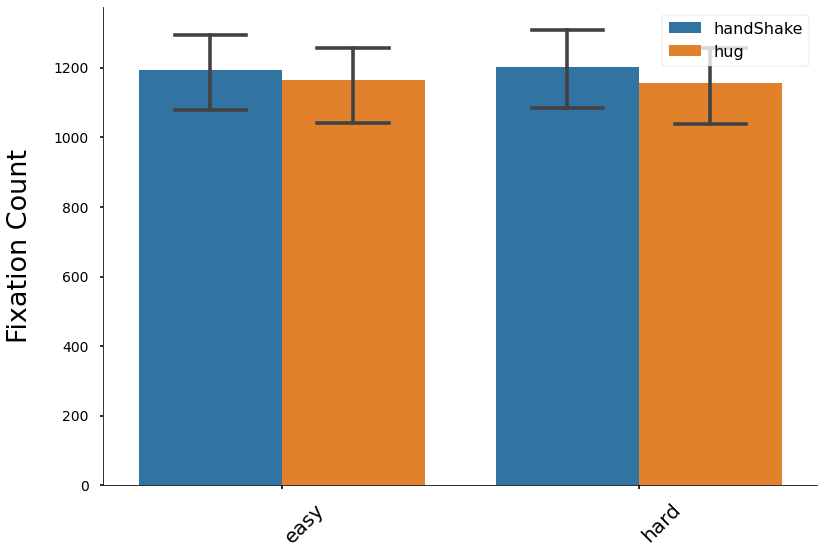

In [102]:
# plot fixation count vs. condition name, separated by label
#not able to add "hue" criteria for these visuals


vis.plot_fixation_count(dataframe=df_merged, x='condition_name', hue= "label", save_title = 'fig4.png')




In [ ]:
vis.plot_fixation_duration(dataframe=df_merged, x='condition_name', hue= "label")

In [ ]:
# vis.plot_fixation_count(dataframe=df_merged, x='label', hue= "initiator_condition_name")
#more fixations and saccades for male initiators for this specific video type
#what does this say about prediction accuracy?
#is there a gendered effect in terms of eye-movements, accuracy,etc? 
#breakdown of individual participant results- are there fixation patterns that differ within individuals (male vs. female participants? how does this breakdown in terms of the initiator )

In [ ]:
vis.plot_fixation_count(dataframe=df_merged, x='label', hue= "initiator")


In [ ]:
vis.plot_rt(dataframe=df_behav, x='label', hue= 'initiator')


In [ ]:
vis.plot_saccade_count(dataframe=df_merged, x='label', hue= 'initiator')

In [ ]:
vis.plot_fixation_duration(dataframe=df_merged, x= 'label', hue = 'initiator')


In [ ]:
vis.plot_fixation_count(dataframe=df_merged, x='label')

In [ ]:
vis.plot_fixation_count(dataframe=df_merged, x='run_num')
#think about confounds as well- 500 ms fixation cross before video onset

In [ ]:
# heatmap
#goal: overlay average eye movement patterns 
# one subj, one run
for run in range(14):
    tmp = df_eye[(df_eye['subj']=='sIU') & (df_eye['run_num']==run+1) & (df_eye['type']=="fixations")]
    vis.plot_gaze_positions(dataframe=tmp)
    plt.title(f'run{run+1}')